# 4.9.3 다중 입력 로지스틱 회귀

## 2개의 입력을 받아 0 또는 1을 출력하는 로지스틱 회귀를 keras로 구현 (AND 연산 구현)

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

## sigmoid(w1x1+w2x2+b)의 형태를 갖는 로지스틱 회귀 모델을 keras로 구현

Mounted at /content/drive


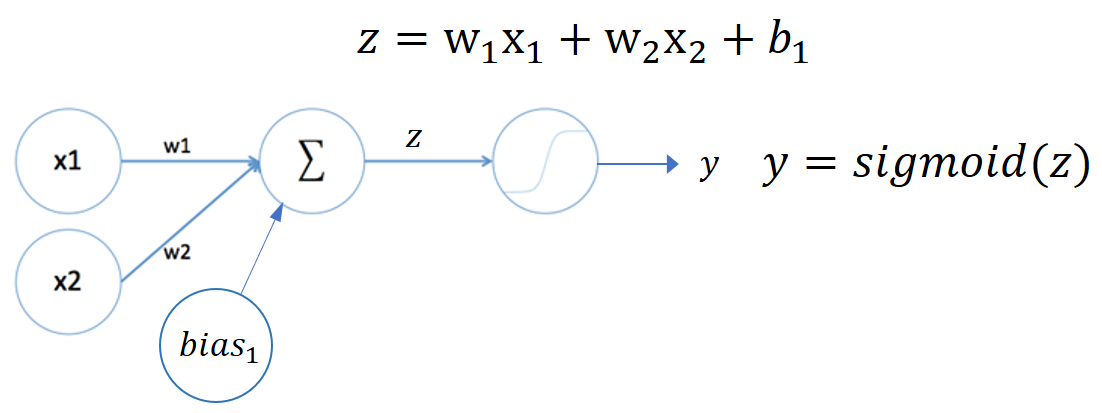

In [2]:
# 이미지를 불러오기 위해 구글 드라이브 연동하기
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# 구글 드라이브의 로지스틱 회귀 모델 이미지 불러오기("내 드라이브" 폴더 => /content/drive/My Drive/)
from IPython.display import Image
Image("/content/drive/MyDrive/Colab Notebooks/png/4.9.3_다중_로지스틱_회귀.png", width=600, height=230)

In [3]:
# sigmoid(w1x1 + w2x2 + b)의 형태를 갖는 로지스틱 회귀를 keras로 구현
model = Sequential()

# 입력(input_dim) 2개를 받아 출력(units) 1개를 반환하는 선형회귀 레이어를 생성
model.add(Dense(input_dim=2, units = 1))
# 선형회귀의 출력 값을 sigmoid에 연결
model.add(Activation('sigmoid'))

# 크로스 엔트로피를 손실 함수로 설정해 경사하강법으로 학습 설정 
# sgd -> SGD(Stochastic Gradient Descent, 경사하강법) 사용
# metrics는 평가측정 방법으로서 binary_accuracy는 출력이 0.5 이상이면 1로, 미만이면 0으로 판단
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['binary_accuracy'])

## 학습 데이터 생성

In [4]:
# AND Gate 학습 데이터
X = np.array([(0,0), (0,1), (1,0), (1,1)]) 
Y = np.array([0, 0, 0, 1])

## 모델 학습

In [5]:
model.fit(X, Y, epochs=5000, verbose=0)   # verbose=0 -> 실행결과 출력 안 함.

##  학습 데이터에 따른 실제 모델 출력값 확인

In [6]:
model.predict(X)
# 아래 출력을 보면 앞 3개는 0.5보다 작고, 뒤 1개는 0.5보다 큰 값을 출력함.

array([[0.03641012],
       [0.22455797],
       [0.21361083],
       [0.67551225]], dtype=float32)

## 모델 요약

In [7]:
model.summary()
# dense : 선형회귀 레이어 -> activation : 시그모이드 함수
# dense의 Param 수가 3인 것은 w1, w2(가중치, weight)와 b(바이어스, bias)를 뜻함.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [8]:
# 첫 번째 레이어에 존재하는 w1, w2와 b 정보 확인
model.layers[0].weights
# (2, 1) : 2행 1열 -> w1, w2(weight)
# (1, ) -> b(bias)

[<tf.Variable 'dense/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[1.9725231],
        [2.0365195]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([-3.275819], dtype=float32)>]